<a href="https://colab.research.google.com/github/deveshshrestha20/Open-CV/blob/main/Lab_6_NN_Pattern_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Fetch MNIST from OpenML
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Convert labels to integers
y = y.astype(int)

# Check shapes
print("Dataset shape:", X.shape, y.shape)  # (70000, 784), (70000,)



Dataset shape: (70000, 784) (70000,)


In [4]:
# Normalize the pixel values (0–255 → 0–1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),   # One hidden layer with 100 neurons
    activation='relu',
    solver='adam',
    batch_size=128,
    max_iter=20,
    random_state=42,
    verbose=True
)

mlp.fit(X_train, y_train)


Iteration 1, loss = 0.31469670
Iteration 2, loss = 0.12608333
Iteration 3, loss = 0.08379208
Iteration 4, loss = 0.06264917
Iteration 5, loss = 0.04745256
Iteration 6, loss = 0.03558027
Iteration 7, loss = 0.02865803
Iteration 8, loss = 0.02152781
Iteration 9, loss = 0.01661333
Iteration 10, loss = 0.01254608
Iteration 11, loss = 0.00978030
Iteration 12, loss = 0.00850968
Iteration 13, loss = 0.01223586
Iteration 14, loss = 0.01129782
Iteration 15, loss = 0.01070864
Iteration 16, loss = 0.00861218
Iteration 17, loss = 0.00745588
Iteration 18, loss = 0.00313589
Iteration 19, loss = 0.00301929
Iteration 20, loss = 0.00657286


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=128, max_iter=20, random_state=42, verbose=True)

In [6]:
y_pred = mlp.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9704285714285714
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.99      0.99      0.99      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.97      0.97      1433
           4       0.97      0.98      0.97      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.97      0.94      0.96      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



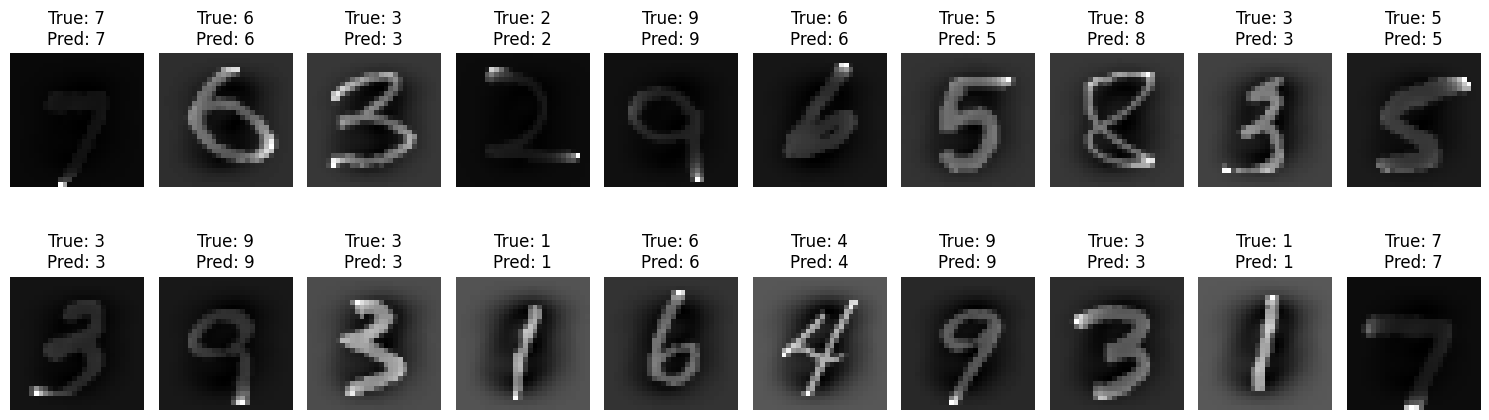

In [9]:
# Show 20 test images with predicted and true labels
def show_predictions(X_test_scaled, y_test, y_pred, n=20):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        idx = np.random.randint(0, len(X_test_scaled))
        image = X_test_scaled[idx].reshape(28, 28)  # Scaled data is still reshaped like normal
        plt.subplot(2, 10, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
show_predictions(X_test, y_test, y_pred, n=20)